In [24]:
# Import the necessary packages
import pandas as pd
from aif360.datasets import StandardDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

 Analyzing and visualizing data to uncover patterns, characteristics, and insights, often using statistical graphics and other data visualization techniques.

In [25]:
#Load the dataset that be used on the analysis
df=pd.read_csv("./data/Students_dropout_Academic_success.csv", sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [26]:
# Check the unique values of the target variable.
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

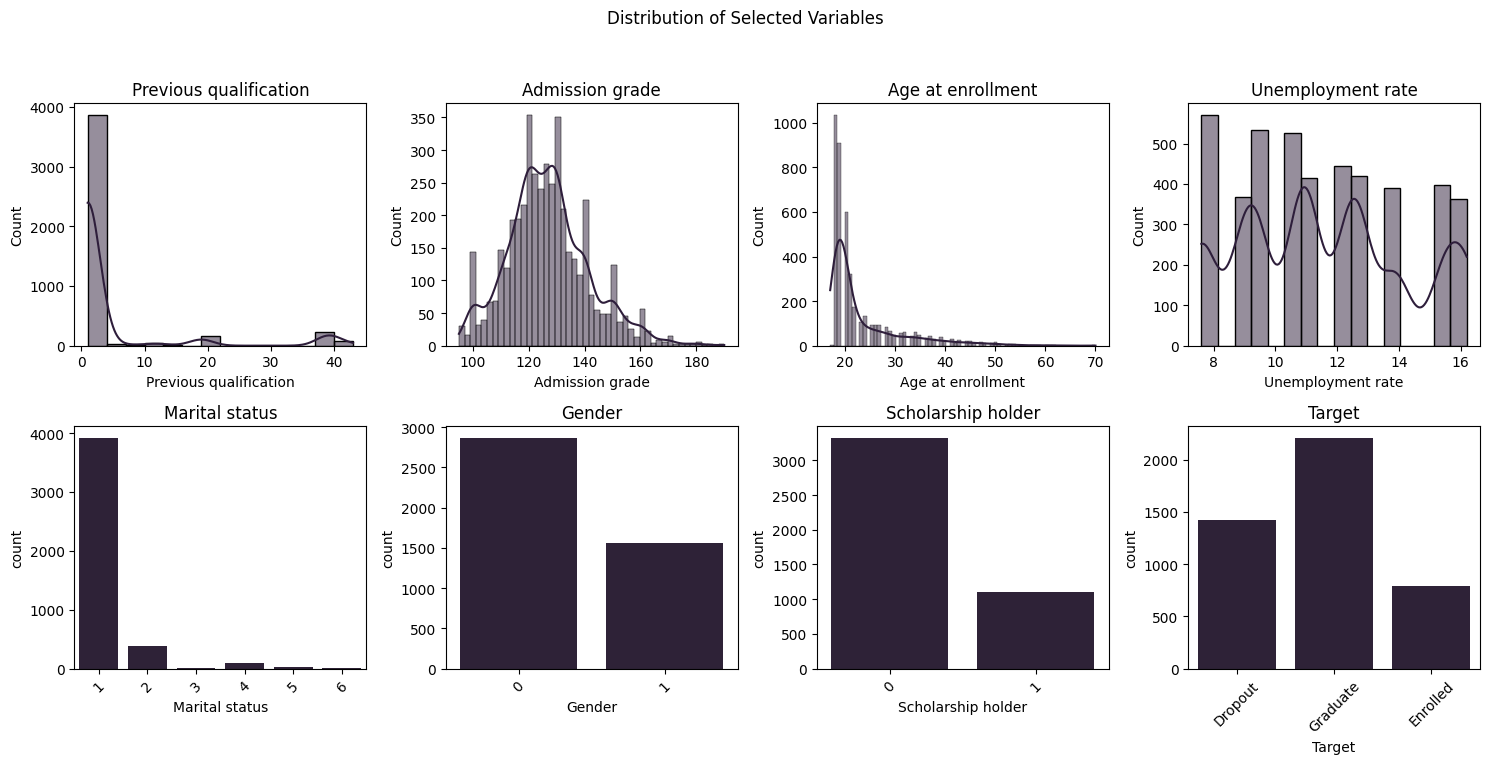

In [27]:
# Selecting a few representative numerical and categorical variables
numerical_vars = ['Previous qualification', 'Admission grade', 'Age at enrollment', 'Unemployment rate']
categorical_vars = [ 'Marital status', 'Gender', 'Scholarship holder', 'Target']

# Setting up the plot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Distribution of Selected Variables')
sns.set_palette('mako')

# Plotting histograms for numerical variables
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], kde=True, ax=axes[0, i])
    axes[0, i].set_title(var)

# Plotting bar plots for categorical variables
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes[1, i])
    axes[1, i].set_title(var)
    axes[1, i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Data Preprocessing


Preprocessing of data involves cleaning and organizing raw data into a suitable format for analysis and model training.

In [28]:
## Keep only Dropout and Graduate values.
df=df[df['Target'].isin(['Dropout', 'Graduate'])]

## Replace these values with 0 and 1, respectively.
df['Target'].replace({'Dropout':0, 'Graduate':1}, inplace=True)

C:\Users\dinat\AppData\Local\Temp\ipykernel_10424\965046470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'].replace({'Dropout':0, 'Graduate':1}, inplace=True)


In [29]:
## Ensure that column names are consistent by applying a regular expression replacement.
df.columns=df.columns.str.replace(r'\/s+|[^a-zA-Z0-9]', '_', regex=True)

In [30]:
## Define the desired age groups.
age_bins = [0, 21, 30, 45, 60, float('inf')]  

## Labels for the age groups.
age_labels = [1, 2, 3, 4, 5]  

## Redefine the column 'Age_at_enrollment' with the respective age group for each record.
df['Age_at_enrollment'] = pd.cut(df['Age_at_enrollment'], bins=age_bins, labels=age_labels, right=False).astype(int)

C:\Users\dinat\AppData\Local\Temp\ipykernel_10424\3805920849.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_at_enrollment'] = pd.cut(df['Age_at_enrollment'], bins=age_bins, labels=age_labels, right=False).astype(int)


In [31]:
# Define the desired admission groups.
admission_bins = [0.0, 114.0, 133.0, 152.0, 171.0, float('inf')] 

## Labels for the admission groups.
admission_labels = [1, 2, 3, 4, 5]  

## Redefine the column 'Admission_grade' with the respective age group for each record.
df['Admission_grade'] = pd.cut(df['Admission_grade'], bins=admission_bins, labels=admission_labels, right=False)

# Convert to integers
df['Admission_grade'] = df['Admission_grade'].astype(int)

C:\Users\dinat\AppData\Local\Temp\ipykernel_10424\2361234866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admission_grade'] = pd.cut(df['Admission_grade'], bins=admission_bins, labels=admission_labels, right=False)
C:\Users\dinat\AppData\Local\Temp\ipykernel_10424\2361234866.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admission_grade'] = df['Admission_grade'].astype(int)


In [32]:
"""Create a nested list with the most frequent value in each column 
for the subset of rows where the 'Target' column has a value of 1. 
This list represents the privileged groups of each column.
"""

total_priv_attr=[]
total_columns=list(df.columns)[:-1]
for col in total_columns:
    total_priv_attr.append([df[df['Target']==1][col].value_counts().head(1).index[0]])

In [20]:
## Keep only the categorical values.
categorical_features=list(set(df.select_dtypes(include="object").columns)-set(['Target']))
                                
## Preprocess the dataset
standard_df=StandardDataset(
                                df=df,
                                label_name='Target',
                                favorable_classes=[1],
                                protected_attribute_names=total_columns,
                                privileged_classes=total_priv_attr,
                                categorical_features=categorical_features
                            ).convert_to_dataframe()[0].reset_index(drop=True)

In [28]:
standard_df.to_csv('./data/standard_df.csv', index=False)